<a href="https://colab.research.google.com/github/alditaufik137/LSTMPredictionNikkei225/blob/main/PI_(Index_Nikkei_225_with_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **IMPORT LIBRARY**



In [ ]:
#library preprocessing
import numpy as np # library untuk mengubah gambar menjadi array
import pandas as pd # library untuk mengolah data tabel
from sklearn.preprocessing import MinMaxScaler # library untuk normalisasi
import zipfile, os # library untuk mendownload zipfile

#library visualisasi
import matplotlib.pyplot as plt # Library untuk visualisai plot
import seaborn as sns # Library untuk visualisai plot lebih bagus

#library model
import tensorflow as tf # library machine learning dari google untuk memproses dataset
from tensorflow.keras.optimizers import RMSprop # Mengimport optimizer untuk model
from keras.callbacks import ModelCheckpoint # Callback untuk menyimpan model
import keras.backend as K # Untuk membuat fungsi R2 Keras

#library perhitungan
from sklearn.metrics import mean_squared_error # Untuk menggunakan loss mean squared error pada model
from sklearn.metrics import r2_score # Untuk menghitung koefisien determinasi

#**Import Dataset**
Mendownload Dataset Index Nikkei 225 yang diambil dari Yahoo! finance https://finance.yahoo.com/quote/%5EN225?p=^N225 dan telah dimasukkan ke dalam Dropbox

Indeks Nikkei 225 merupakan indeks utama di bursa Tokyo dan dipandang sebagai salah satu barometer penting perekonomian dan pasar saham Jepang. Indeks Nikkei disebut-sebut sama seperti indeks Dow Jones. Indeks ini merupakan indeks tertua di kawasan Asia yang mulai muncul sekitar pada tahun 1950. indeks Nikkei diciptakan oleh surat kabar ekonomi Jepang Nihon Keizai Shimbun.

In [ ]:
# Mendownload dataset menggunakan wget

!wget --no-check-certificate \
  https://dl.dropbox.com/s/vsbkkbr52qg3bkr/N225.zip?dl=0 \
  -O /tmp/N225.zip

--2021-07-24 14:50:07--  https://dl.dropbox.com/s/vsbkkbr52qg3bkr/N225.zip?dl=0
Resolving dl.dropbox.com (dl.dropbox.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f
Connecting to dl.dropbox.com (dl.dropbox.com)|162.125.5.15|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/s/vsbkkbr52qg3bkr/N225.zip?dl=0 [following]
--2021-07-24 14:50:07--  https://dl.dropboxusercontent.com/s/vsbkkbr52qg3bkr/N225.zip?dl=0
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.5.15, 2620:100:601d:15::a27d:50f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.5.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228168 (223K) [application/zip]
Saving to: ‘/tmp/N225.zip’

/tmp/N225.zip       100%[===================>] 222.82K  --.-KB/s    in 0.08s   

2021-07-24 14:50:08 (2.67 MB/s) - ‘/tmp/N225.zip’ saved [228168/228168]



# **Data Prepocessing**

In [ ]:
# Mengekstrak folder zip yang telah terdownload
local_zip = '/tmp/N225.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/N225'

In [ ]:
df = pd.read_csv('/tmp/N225.csv')
print(df.shape)
print(df.dtypes)

(14528, 7)
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


Menampilkan 5 Data teratas dari table

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0.0
1,1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0.0
2,1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0.0
3,1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0.0
4,1965-01-11,NaN,NaN,NaN,NaN,NaN,NaN


Menampilkan 5 Data terbawah dari table

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
14523,2021-07-06,28677.949219,28748.230469,28587.609375,28643.210938,28643.210938,41700000.0
14524,2021-07-07,28262.400391,28434.990234,28161.750000,28366.949219,28366.949219,60300000.0
14525,2021-07-08,28332.630859,28366.759766,28118.029297,28118.029297,28118.029297,62200000.0
14526,2021-07-09,27739.419922,28000.019531,27419.400391,27940.419922,27940.419922,82300000.0
14527,2021-07-12,28412.699219,28595.119141,28405.599609,28580.779297,28580.779297,0.0


In [ ]:
# Melihat informasi dari table dan terdapat 14.527 sample
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14528 non-null  object 
 1   Open       13902 non-null  float64
 2   High       13902 non-null  float64
 3   Low        13902 non-null  float64
 4   Close      13902 non-null  float64
 5   Adj Close  13902 non-null  float64
 6   Volume     13902 non-null  float64
dtypes: float64(6), object(1)
memory usage: 794.6+ KB


In [ ]:
# Melihat jumlah sampel yang NAN (tidak ada nilainya)
df.isna().sum()

Date           0
Open         626
High         626
Low          626
Close        626
Adj Close    626
Volume       626
dtype: int64

In [ ]:
# Menghapus sample NaN
df=df.dropna()
print(df)
print(df.shape)

             Date          Open  ...     Adj Close      Volume
0      1965-01-05   1257.719971  ...   1257.719971         0.0
1      1965-01-06   1263.989990  ...   1263.989990         0.0
2      1965-01-07   1274.270020  ...   1274.270020         0.0
3      1965-01-08   1286.430054  ...   1286.430054         0.0
5      1965-01-12   1288.540039  ...   1288.540039         0.0
...           ...           ...  ...           ...         ...
14523  2021-07-06  28677.949219  ...  28643.210938  41700000.0
14524  2021-07-07  28262.400391  ...  28366.949219  60300000.0
14525  2021-07-08  28332.630859  ...  28118.029297  62200000.0
14526  2021-07-09  27739.419922  ...  27940.419922  82300000.0
14527  2021-07-12  28412.699219  ...  28580.779297         0.0

[13902 rows x 7 columns]
(13902, 7)


In [ ]:
# Merubah tipe data kolom 'Date' menjadi 'datetime'
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0.0
1,1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0.0
2,1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0.0
3,1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0.0
5,1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0.0


#**Visualisasi data Index Nikkei 225**
Menampilkan keseluruhan harga pembukaan Nikkei 225 dengan plot visualisasi agar dapat dimengerti oleh orang pembaca



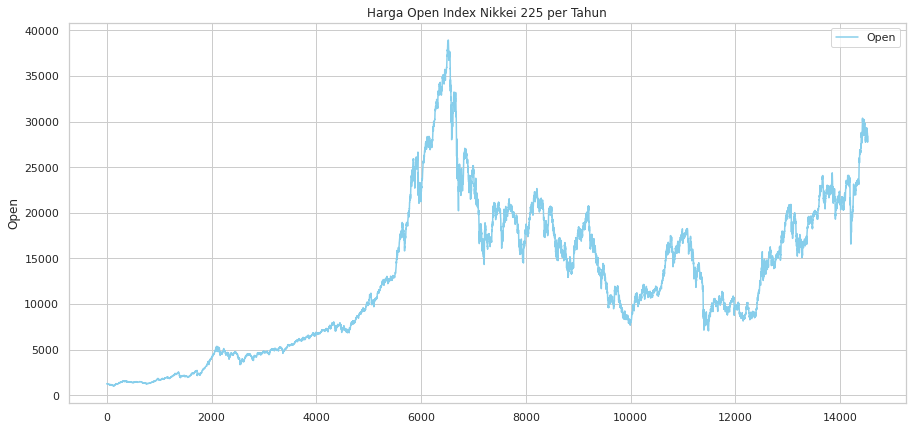

In [ ]:
# Menampilkan visualisasi menggunakan matplotlib dan seaborn
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
plt.title('Harga Open Index Nikkei 225 per Tahun')
sns.lineplot(data=df['Open'], label='Open',color='skyblue')

In [ ]:
# Membuat variabel duplikat yang akan digunakan untuk preprocessing
df2=df.copy()
df2.shape

(13902, 7)

#**Pembagian Data Train dan Data Test**
Membagi Dataset dengan rasio 80% Data Train dan 20% Data Test


In [ ]:
df2.reset_index(drop=True,inplace=True)
df_train = df2.loc[:int(df2.shape[0]*0.8),:]
df_test = df2.loc[int(df2.shape[0]*0.8):,:]
df2.shape

(13902, 7)

In [ ]:
df_train.shape

(11122, 7)

In [ ]:
df_test.shape


(2781, 7)

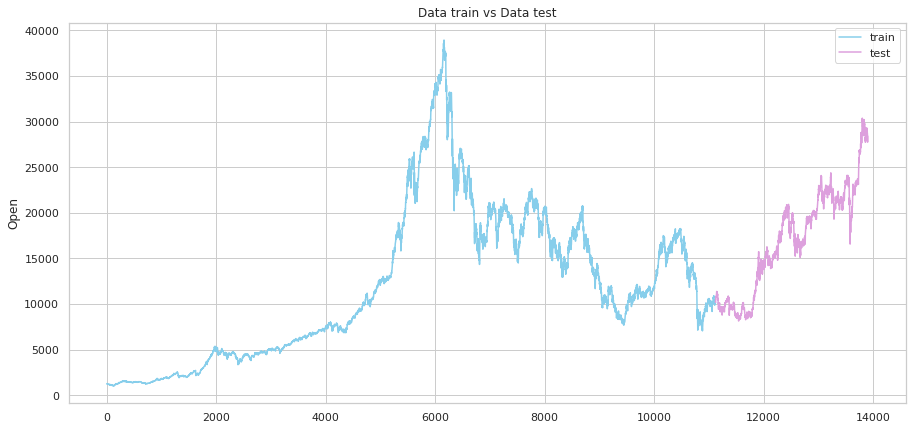

In [ ]:
# Menampilkan pembagian dataset dengan plot visualisasi
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
plt.title('Data train vs Data test')
sns.lineplot(data=df_train['Open'], label='train',color='skyblue')
sns.lineplot(data=df_test['Open'], label='test',color='plum')

In [ ]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,1965-01-05,1257.719971,1257.719971,1257.719971,1257.719971,1257.719971,0.0
1,1965-01-06,1263.989990,1263.989990,1263.989990,1263.989990,1263.989990,0.0
2,1965-01-07,1274.270020,1274.270020,1274.270020,1274.270020,1274.270020,0.0
3,1965-01-08,1286.430054,1286.430054,1286.430054,1286.430054,1286.430054,0.0
4,1965-01-12,1288.540039,1288.540039,1288.540039,1288.540039,1288.540039,0.0
...,...,...,...,...,...,...,...
11117,2010-02-25,10256.099609,10267.429688,10087.209961,10101.959961,10101.959961,128200.0
11118,2010-02-26,10107.080078,10171.219727,10085.129883,10126.030273,10126.030273,113200.0
11119,2010-03-01,10128.730469,10215.150391,10116.860352,10172.059570,10172.059570,108400.0
11120,2010-03-02,10199.190430,10238.959961,10150.299805,10221.839844,10221.839844,104000.0


In [ ]:
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
11121,2010-03-03,10193.950195,10274.089844,10186.679688,10253.139648,10253.139648,120600.0
11122,2010-03-04,10255.690430,10263.480469,10134.370117,10145.719727,10145.719727,126300.0
11123,2010-03-05,10254.610352,10376.410156,10254.610352,10368.959961,10368.959961,129900.0
11124,2010-03-08,10538.120117,10586.969727,10514.280273,10585.919922,10585.919922,140500.0
11125,2010-03-09,10567.320313,10593.269531,10542.809570,10567.650391,10567.650391,110100.0
...,...,...,...,...,...,...,...
13897,2021-07-06,28677.949219,28748.230469,28587.609375,28643.210938,28643.210938,41700000.0
13898,2021-07-07,28262.400391,28434.990234,28161.750000,28366.949219,28366.949219,60300000.0
13899,2021-07-08,28332.630859,28366.759766,28118.029297,28118.029297,28118.029297,62200000.0
13900,2021-07-09,27739.419922,28000.019531,27419.400391,27940.419922,27940.419922,82300000.0


Agar dapat diproses oleh model, kita perlu mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array menggunakan atribut values.



In [ ]:
# Mengubah nilai kolom 'Open' pada DataFrame ke dalam tipe data numpy array
training_set = df2.iloc[:, 1:2].values
training_set

array([[ 1257.719971],
       [ 1263.98999 ],
       [ 1274.27002 ],
       ...,
       [28332.630859],
       [27739.419922],
       [28412.699219]])

#**Feature Scaling**
Melakukan feature scaling yaitu suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Biasa disebut juga normalisasi



In [ ]:
# Menormalisasikan nilai sample menjadi nilai dengan rentang 0 sampai 1 untuk dimasukkan ke dalam model
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.00625917],
       [0.00642461],
       [0.00669584],
       ...,
       [0.72061494],
       [0.70496341],
       [0.72272749]])

#**Pembuatan Struktur Data**

In [ ]:
# Membuat data struktur dengan 60 selisih waktu and 1 output
X_train = []
y_train = []
for i in range(60, 11122):
    X_train.append(training_set_scaled[i-60:i, 0])  # Struktur untuk X_train
    y_train.append(training_set_scaled[i, 0])       # Struktur untuk y_train
X_train, y_train = np.array(X_train), np.array(y_train)
print(len(X_train))
print(len(y_train))

11062
11062


In [ ]:
# Reshaping data ke nilai 0 sampai 1
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.00625917],
        [0.00642461],
        [0.00669584],
        ...,
        [0.00296244],
        [0.00282551],
        [0.00285163]],

       [[0.00642461],
        [0.00669584],
        [0.00701667],
        ...,
        [0.00282551],
        [0.00285163],
        [0.00274292]],

       [[0.00669584],
        [0.00701667],
        [0.00707234],
        ...,
        [0.00285163],
        [0.00274292],
        [0.00353287]],

       ...,

       [[0.21552586],
        [0.21797039],
        [0.22509338],
        ...,
        [0.24233192],
        [0.24367618],
        [0.23974439]],

       [[0.21797039],
        [0.22509338],
        [0.22918902],
        ...,
        [0.24367618],
        [0.23974439],
        [0.24031562]],

       [[0.22509338],
        [0.22918902],
        [0.23742679],
        ...,
        [0.23974439],
        [0.24031562],
        [0.24217467]]])

In [ ]:
len(X_train)

11062

In [ ]:
# Membuat kelas dan fungsi agar proses training berhenti saat Koefisien Determinasi model telah mencapai 98%
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('r2_keras') >= 0.90):
      print("\nKoefisien Determinasi telah mencapai > 90%!")
      self.model.stop_training = True
myCallBack = myCallBack()
# Fungsi untuk menyimpan model
save_direc = os.path.join(os.getcwd(), '/content/sample_data')

model_name = 'Nikkei-LSTM_weight_model.h5'

# Membuat directory untuk menyimpan model
if not os.path.isdir(save_direc):
    os.makedirs(save_direc)

# Menggabungkan directory dengan model
modelpath = os.path.join(save_direc, model_name)

checkpoint = ModelCheckpoint(filepath = modelpath, monitor = 'mae', verbose = 1, save_best_only = True, 
                             save_weights_only = True, period=1)

Koefisien determinasi digunakan sebagai informasi mengenai kecocokan suatu model dan dihitung untuk mengetahui sejauh mana kecocokan sejumlah variabel bebas yang ada dalam sebuah model persamaan regresi linier berganda secara berbarengan mampu menjelaskan variabel tidak bebasnya.

Nilai koefisien determinasi sendiri berada di rentang nol sampai satu. Suatu nilai ini bisa dikatakan ‘baik’ jika ia berada di atas angka 0,5, sebaliknya suatu nilai koefisien determinasi dibilang ‘tidak baik’ jika di bawah 0,5.

In [ ]:
# Membuat fungsi untuk koefisien determinasi yang akan digunakan ke dalam model
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true - y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

Arsitektur model menggunakan 4 layer LSTM dengan dimensi sebesar 50 pada masing-masing layer, serta 0.2/20% dropout pada setiap layer LSTM agar model tidak overfitting.



In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1)), # Menambahkan layer LSTM pertama
  tf.keras.layers.Dropout(0.2), # Menggunakan dropout agar model tidak overfitting
  tf.keras.layers.LSTM(50, return_sequences=True), # Menambahkan layer LSTM kedua
  tf.keras.layers.Dropout(0.2), # Menggunakan dropout agar model tidak overfitting
  tf.keras.layers.LSTM(50, return_sequences=True), # Menambahkan layer LSTM ketiga
  tf.keras.layers.Dropout(0.2), # Menggunakan dropout agar model tidak overfitting
  tf.keras.layers.LSTM(50), # Menambahkan layer LSTM keempat
  tf.keras.layers.Dropout(0.2), # Menggunakan dropout agar model tidak overfitting
  tf.keras.layers.Dense(1), # Outputnya adalah 1 
])
model.summary() # Melihat shape dan parameter model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 50)            20200     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)               

In [ ]:
model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.001),
              metrics=[r2_keras, 'mae']) 
history = model.fit(X_train, y_train, epochs = 100, 
                    batch_size = 128, callbacks=[myCallBack, checkpoint], verbose = 1)

Epoch 1/100
87/87 [==============================] - 26s 223ms/step - loss: 0.0094 - r2_keras: 0.8082 - mae: 0.0600

Epoch 00001: mae improved from inf to 0.06002, saving model to /content/sample_data/Nikkei-LSTM_weight_model.h5
Epoch 2/100
87/87 [==============================] - 19s 221ms/step - loss: 0.0038 - r2_keras: 0.9163 - mae: 0.0418

Koefisien Determinasi telah mencapai > 90%!

Epoch 00002: mae improved from 0.06002 to 0.04177, saving model to /content/sample_data/Nikkei-LSTM_weight_model.h5


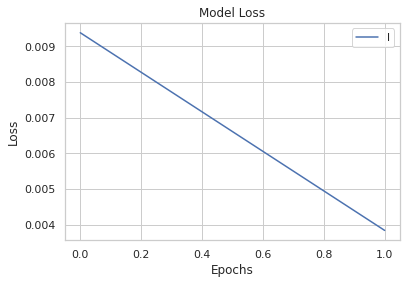

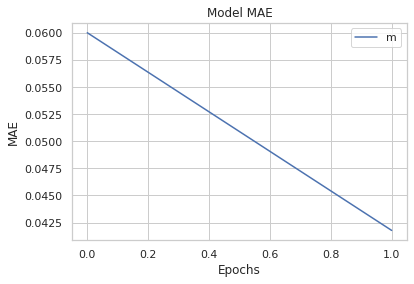

In [ ]:
# Menampilkan plot loss dari model
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend('loss')
plt.show()
# Menampilkan plot mae dari model
plt.plot(history.history['mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epochs')
plt.legend('mae')
plt.show()

#**Prediksi Model LSTM**
Untuk membuktikan model LSTM bagus atau tidak, maka saya berinsiatif untuk melakukan prediksi terhadap data test dan train



In [ ]:
# Melakukan duplikasi pada Dataset test dan train dan mengubah menjadi numpy array 
dataset_test = df_test.copy()
dataset_train = df_train.copy()
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price1 = dataset_train.iloc[60:, 1:2].values
dataset_total = pd.concat((df_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

print('Panjang data total :', len(dataset_total))
print('Panjang data test :', len(dataset_test))
print('Panjang data train :', len(df_train))

Panjang data total : 13903
Panjang data test : 2781
Panjang data train : 11122


In [ ]:
inputs1 = df_train.Open.values
inputs1 = inputs1.reshape(-1,1)
inputs1 = sc.transform(inputs1)

print(len(inputs))
print(len(inputs1))

2841
11122


Memasukkan nilai dari data test ke dalam X_test dan data train ke dalam X_test1 lalu mereshape nilai tersebut ke dalam nilai dari 0 sampai 1



In [ ]:
X_test = []
for i in range(60, 2841):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_test1 = []
for i in range(60,11122):
    X_test1.append(inputs1[i-60:i, 0])
X_test1 = np.array(X_test1)
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))

print(len(X_test))
print(len(X_test1))

2781
11062


In [ ]:
# Menggunakan model untuk memprediksi nilai data test
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[ 8377.667],
       [ 8374.648],
       [ 8372.562],
       ...,
       [23007.71 ],
       [22997.428],
       [22982.082]], dtype=float32)

In [ ]:
# Menggunakan model untuk memprediksi nilai data train
predicted_stock_price1 = model.predict(X_test1)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)
predicted_stock_price1

array([[1298.9548],
       [1296.7256],
       [1294.4104],
       ...,
       [8394.82  ],
       [8387.351 ],
       [8381.781 ]], dtype=float32)

In [ ]:
print('Dimensi real data test :', real_stock_price.shape)
print('Dimensi prediksi data test :', predicted_stock_price.shape)
print('Dimensi real data train :', real_stock_price1.shape)
print('Dimensi prediksi data train :', predicted_stock_price1.shape)

Dimensi real data test : (2781, 1)
Dimensi prediksi data test : (2781, 1)
Dimensi real data train : (11062, 1)
Dimensi prediksi data train : (11062, 1)


In [ ]:
# Memasukkan nilai asli data test dan prediksinya ke dalam dataframe
pred = pd.DataFrame(list(zip(predicted_stock_price,real_stock_price)), 
                  columns = ('Predict','Real'))
pred.head()

,Predict,Real
0,[8377.667],[10193.950195]
1,[8374.648],[10255.69043]
2,[8372.562],[10254.610352]
3,[8371.324],[10538.120117]
4,[8371.385],[10567.320313]


In [ ]:
# Memasukkan nilai asli data train dan prediksinya ke dalam dataframe
pred1 = pd.DataFrame(list(zip(predicted_stock_price1,real_stock_price1)), 
                  columns = ('Predict','Real'))
pred1.head()

,Predict,Real
0,[1298.9548],[1124.449951]
1,[1296.7256],[1154.390015]
2,[1294.4104],[1159.97998]
3,[1292.0796],[1183.119995]
4,[1289.8542],[1180.569946]


#**Evaluasi Model**
Evaluasi model menggunakan Mean Absolute Error dan Mean Absolute Percentage Error



In [ ]:
# Membuat fungsi untuk MAPE dan MAE
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def mae(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))
print('Nilai Koefisien Determinasi terhadap Data Test\nR2: ',r2_score(predicted_stock_price,real_stock_price),'\n')

mape1 = mae(predicted_stock_price,real_stock_price)
print('Nilai Mean Absolute Error Prediksi terhadap Data Test\nMAPE: ' "{:.2f}".format(mape1),'\n')

mape2 = mape(predicted_stock_price,real_stock_price)
print('Nilai Mean Absolute Percentage Error Prediksi terhadap Data Test\nMAPE: ' "{:.2f}".format(mape2)+'%')

Nilai Koefisien Determinasi terhadap Data Test
R2:  0.370058260650339 

Nilai Mean Absolute Error Prediksi terhadap Data Test
MAPE: 0.23 

Nilai Mean Absolute Percentage Error Prediksi terhadap Data Test
MAPE: 23.40%


In [ ]:
print('Nilai Koefisien Determinasi terhadap Data Train\nR2: ',r2_score(predicted_stock_price1,real_stock_price1),'\n')

mape1 = mae(predicted_stock_price1,real_stock_price1)
print('Nilai Mean Absolute Error Prediksi terhadap Data Train\nMAPE: ' "{:.2f}".format(mape1),'\n')

mape2 = mape(predicted_stock_price1,real_stock_price1)
print('Nilai Mean Percentage Error Prediksi terhadap Data Train\nMAPE: ' "{:.2f}".format(mape2)+'%')

Nilai Koefisien Determinasi terhadap Data Train
R2:  0.8037250932581158 

Nilai Mean Absolute Error Prediksi terhadap Data Train
MAPE: 0.19 

Nilai Mean Percentage Error Prediksi terhadap Data Train
MAPE: 19.42%


#**Visualisasi Hasil Prediksi Model**
Membuat visualisasi dengan diagram pencar dan diagram garis untuk memudahkan pembaca untuk melihat hasil prediksi





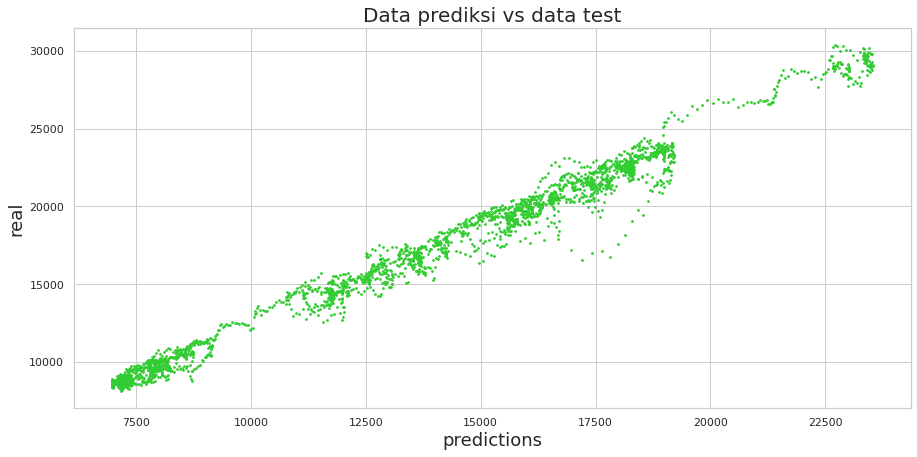

In [ ]:
# Membuat diagram pencar untuk memperlihatkan ke akuratan hasil prediksi dan nilai real pada dataset
# Data prediksi vs data test

plt.figure(figsize=(15,7))
plt.scatter(x=predicted_stock_price,y=real_stock_price,s=3,color='limegreen')
plt.xlabel('predictions',fontsize=18)
plt.ylabel('real',fontsize=18)
plt.title('Data prediksi vs data test',fontsize=20)
plt.show()

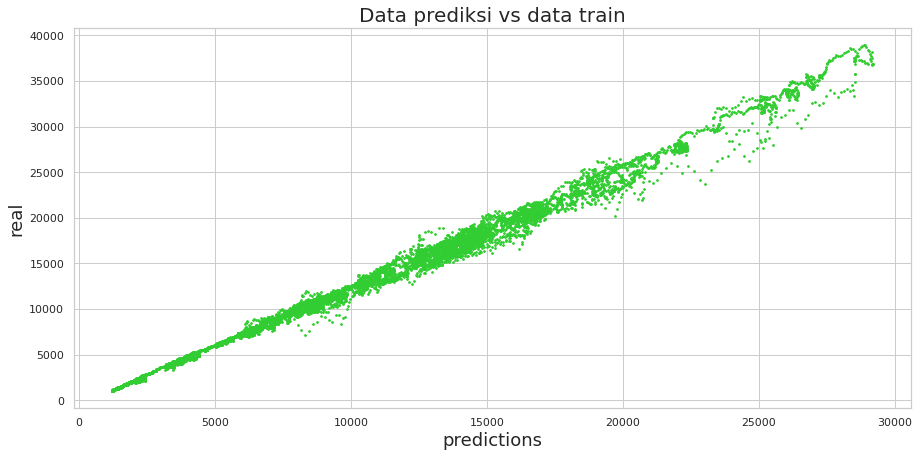

In [ ]:
# Membuat diagram pencar untuk memperlihatkan ke akuratan hasil prediksi dan nilai real pada dataset
# Data prediksi vs data train

plt.figure(figsize=(15,7))
plt.scatter(x=predicted_stock_price1,y=real_stock_price1,s=3,color='limegreen')
plt.xlabel('predictions',fontsize=18)
plt.ylabel('real',fontsize=18)
plt.title('Data prediksi vs data train',fontsize=20)
plt.show()


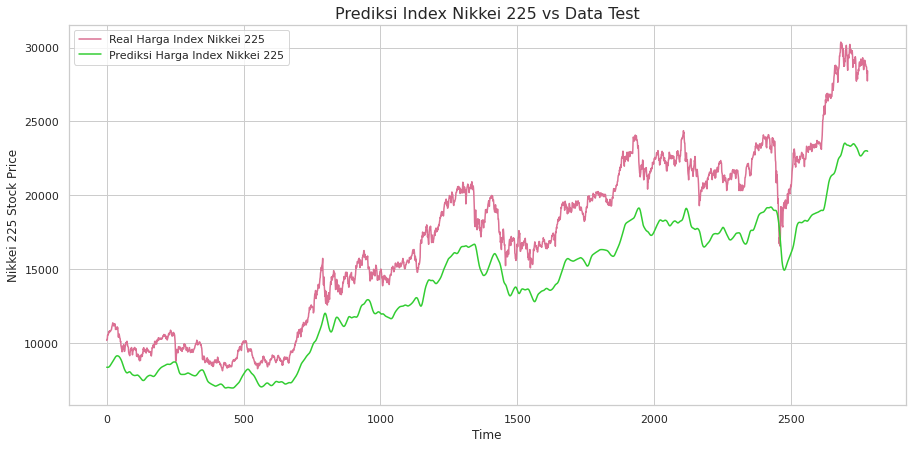

In [ ]:
# Membuat diagram garis untuk memperlihatkan ke akuratan hasil prediksi dan nilai real pada dataset
# Data prediksi vs data test

plt.figure(figsize=(15,7))
plt.plot(real_stock_price, color = 'palevioletred', label = 'Real Harga Index Nikkei 225')
plt.plot(predicted_stock_price, color = 'limegreen', label = 'Prediksi Harga Index Nikkei 225')
plt.title('Prediksi Index Nikkei 225 vs Data Test',fontsize = 16)
plt.xlabel('Time')
plt.ylabel('Nikkei 225 Stock Price')
plt.legend()
plt.show()

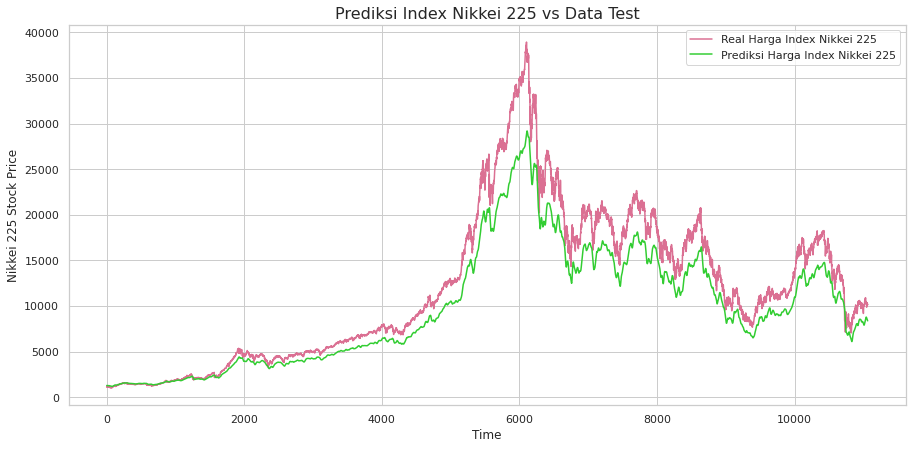

In [ ]:
# Membuat diagram garis untuk memperlihatkan ke akuratan hasil prediksi dan nilai real pada dataset
# Data prediksi vs data train

plt.figure(figsize=(15,7))
plt.plot(real_stock_price1, color = 'palevioletred', label = 'Real Harga Index Nikkei 225')
plt.plot(predicted_stock_price1, color = 'limegreen', label = 'Prediksi Harga Index Nikkei 225')
plt.title('Prediksi Index Nikkei 225 vs Data Test',fontsize = 16)
plt.xlabel('Time')
plt.ylabel('Nikkei 225 Stock Price')
plt.legend()
plt.show()